In [34]:
!pip install matplotlib
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generative Artificial Intelligence

ChatGPT, Claude, Gemini, and CoPilot are all amazing examples of Generative AI technology powered by Large Language Models. But how does it actually work? Let's take a look behind the scenes and into the code of this amazing new technology.

This notebook walks you through creating your own Generative Pretrained Transformer (GPT) language model. First we explore the background science, then we will look at tokens, the atomic units of these large language models. We will then move on to data preparation, training a model and finally, generating text with the model.

## Background

To understand GPTs, we need to understand the foundational science: the Neuron.

<img width="640" alt="image" src="https://github.com/user-attachments/assets/483305da-6c02-4532-8522-255f64b38093">

The intricate dance of synaptic connections and neurotransmitters is a key aspect of neural networks, and understanding these mechanisms has inspired the development of artificial neural networks, which mimic the behavior of biological neurons to process and learn from complex data.

## Mathematical Representation of a Neuron

![axon from a neuron](https://github.com/user-attachments/assets/62da7697-fc31-4670-a2ef-69c1ae4d2aa9)

Multiple inputs (x) are amplified or attenuated (product) by the synaptic weights (w) before being combined (summed) inside the cell body. The cell itself has a bias (b) that gets added to that resulting signal. This signal is then passed through an activation function (f) to determine if the signal will be passed on to other neurons (output). Activation functions in neural networks introduce non-linearity, enabling the network to learn complex patterns. Common activation functions include ReLU, Sigmoid, Tanh, and Softmax. The hyperbolic tangent (`tanh()`) provides a zero-centered output and smooth gradient and is often used in hidden layers of a neural net. Softmax is often used in the output layer of a neural net.

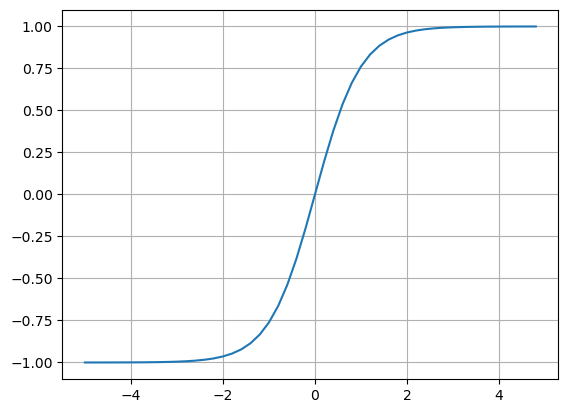

In [36]:
# Activation Function
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

## Neural Networks

![output layer](https://github.com/user-attachments/assets/50033790-4164-4154-8062-aaeef0d56df6)

### How to train a Neural Network

#### 1. Forward Propagation
- Input data is fed into the input layer.
- The data is then passed through each layer, from input to hidden to output.
- At each neuron, the input data is multiplied by the corresponding weights, added to the bias, and passed through the activation function to produce the output: $ z = W \cdot x + b $
- This process continues until the data reaches the output layer, producing the final output of the network.

#### 2. Compute Loss
- After froward propagation, the loss is calculated to deterimne the accuracy of the current prediction.
- The _loss function_ measures the difference between the predicted output and the desired target values.
- Common loss functions include Mean Squared Error (MSE) for regression tasks and Cross-Entropy Loss for classification tasks.

#### 3. Backpropagation
- Once the loss is knows, backpropagation is performed to adjust the weights and biases to minimize the loss.
- This is perfomred by calculating the gradient of the loss function with respect to each weight and bias using the chain rule.
- The gradients are then used to update the weights and biases in the opposite direction of the gradient (by a *learning rate* amount), a process known as _gradient descent_.

#### 4. Repeat
- Forward propagation and backpropagation will be performed over many iterations, adjusting the weights and biases each time to minimize the loss.
- Training continues until the loss converges to a minimum value or a specified number of iterations (epochs) is reached.

## Transformer Architecture

Building upon the biological and mathematical representation of the neuron, the Transformer architecture has emerged as a game-changer in the field of natural language processing. The transformer has given rise to the GenAI movement, a new era of artificial intelligence that is transforming industries and redefining the boundaries of human-machine collaboration.

<img width="706" alt="Transformers" src="https://github.com/user-attachments/assets/f03692ed-7b3b-484f-b41b-b221376cd5a0">

Source : https://www.coursera.org/learn/generative-ai-with-llms

The Transformer architecture was first introduced in the groundbreaking paper "[Attention is All You Need](https://arxiv.org/pdf/1706.03762v1)" by Vaswani et al. in 2017. This seminal work proposed a novel approach to sequence-to-sequence learning, which revolutionized the field of natural language processing (NLP) and beyond. The authors challenged the traditional encoder-decoder architecture, which relied on recurrent neural networks (RNNs) or convolutional neural networks (CNNs) to process sequential data. Instead, they proposed a purely attention-based model, where the encoder and decoder are composed of identical layers, and the attention mechanism is used to weigh the importance of different input elements when computing the output.

<img width="485" alt="Transformer Architecture" src="https://github.com/user-attachments/assets/d1a81768-1a62-4d86-b48b-51c27ca80aa7">


Example Transation:


<img width="640" alt="Translation Example" src="https://github.com/user-attachments/assets/f722b1ba-4660-4782-8ece-aa422bea8a7c">

<img width="640" alt="Decoder" src="https://jalammar.github.io/images/t/transformer_decoding_2.gif">

Source: https://jalammar.github.io/illustrated-transformer/


The Transformer architecture relies on self-attention, a mechanism that allows the model to attend to different parts of the input sequence simultaneously and weigh their importance. This is achieved through a series of linear transformations, which compute the attention weights, and a softmax function, which normalizes these weights to ensure they sum to 1. The attention weights are then used to compute the weighted sum of the input elements, which is used as input to the next layer. This process is repeated multiple times, allowing the model to capture long-range dependencies and contextual relationships in the input sequence. The Transformer architecture has since become a cornerstone of modern NLP, and its variants have been applied to a wide range of tasks, including machine translation, text classification, and question answering.

![animal_](https://github.com/user-attachments/assets/20aeade6-b261-4f82-a818-bf2ed005dd6e)


<img width="800" alt="image" src="https://github.com/user-attachments/assets/c5ff56ca-f985-4c92-9588-c845b05fbf7f">

Source: Visualizing Attention, a Transformer's Heart - https://www.3blue1brown.com/lessons/attention

## All about Tokens

Training an LLM on natural language requires that we convert the language to numeric "signals" to feed into the neural net. These are called tokens. These tokens can be characters, words or even parts of words. They are the atomic components of language.

<img width="532" alt="image" src="https://github.com/user-attachments/assets/bb90fbe5-78ec-45b3-9678-6a95c9baa386">

Source: https://platform.openai.com/tokenizer 

In [ ]:
# First some dependencies need to be installed
!pip install tiktoken
!pip install transformers
!pip install datasets
!pip install tqdm
!pip install torch

In [37]:
import tiktoken

enc = tiktoken.get_encoding("gpt2")
phrase = "The quick brown fox jumped over the lazy snoring dog."
tokens = enc.encode_ordinary(phrase)
# Add end of text token
tokens.append(enc.eot_token)
print(tokens)

[464, 2068, 7586, 21831, 11687, 625, 262, 16931, 3013, 3255, 3290, 13, 50256]


In [38]:
for token in tokens:
    print(f'"{enc.decode([token])}", ',end='')

"The", " quick", " brown", " fox", " jumped", " over", " the", " lazy", " sn", "oring", " dog", ".", "<|endoftext|>", 

In [39]:
# The training target is the next token in the sequence
predictions = tokens[:-1]
targets = tokens[1:] + [enc.encode_ordinary("")]
for x in range(len(predictions)):
    print('|'.join([f'{enc.decode([p])}' for p in predictions[:x+1]]), end='')
    print(f' -> "{enc.decode([targets[x]])}"')


The -> " quick"
The| quick -> " brown"
The| quick| brown -> " fox"
The| quick| brown| fox -> " jumped"
The| quick| brown| fox| jumped -> " over"
The| quick| brown| fox| jumped| over -> " the"
The| quick| brown| fox| jumped| over| the -> " lazy"
The| quick| brown| fox| jumped| over| the| lazy -> " sn"
The| quick| brown| fox| jumped| over| the| lazy| sn -> "oring"
The| quick| brown| fox| jumped| over| the| lazy| sn|oring -> " dog"
The| quick| brown| fox| jumped| over| the| lazy| sn|oring| dog -> "."
The| quick| brown| fox| jumped| over| the| lazy| sn|oring| dog|. -> "<|endoftext|>"


# Tokenize Training Data

We will use the Tiny Shakespeare dataset to train a model. See the [shakespeare.txt](https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt) file.

Divide data into two parts:
- 90% Training
- 10% Validation

In [40]:
import os
import requests
import tiktoken
import numpy as np

# tiny shakespeare dataset
input_file_path = 'data/shakespeare.txt'
if not os.path.exists(input_file_path):
    data_url = 'https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt'
    with open(input_file_path, 'w') as f:
        f.write(requests.get(data_url).text)

with open(input_file_path, 'r') as f:
    data = f.read()
n = len(data)

# Use 90% for training and 10% for validation
train_data = data[:int(n*0.9)]
val_data = data[int(n*0.9):]

# encode with tiktoken gpt2
enc = tiktoken.get_encoding("gpt2")
train_ids = enc.encode_ordinary(train_data)
val_ids = enc.encode_ordinary(val_data)
print(f"train has {len(train_ids):,} tokens")
print(f"val has {len(val_ids):,} tokens")

# export to bin files
train_ids = np.array(train_ids, dtype=np.uint16)
val_ids = np.array(val_ids, dtype=np.uint16)
train_ids.tofile('data/train.bin')
val_ids.tofile('data/val.bin')

train has 301,966 tokens
val has 36,059 tokens


In [41]:
print(len(train_ids))
train_ids

301966


array([ 5962, 22307,    25, ...,   508,  2058,   994], dtype=uint16)

In [42]:
print(enc.decode(train_ids[:50]))

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved.


# GPT Model Class

We will use the `model.py` file contains a GPT model class that was created by Andrej Karpathy. It was modeled after the one created by OpenAI.

GPT, as the name implies, is based on the Transformer technology presented by Google in the paper, "Attention Is All You Need." https://arxiv.org/pdf/1706.03762

References:
* Great Video by Andrej Karpathy - _Let's build GPT: from scratch, in code, spelled out._ - https://www.youtube.com/watch?v=kCc8FmEb1nY
* nanoGPT - https://github.com/karpathy/nanoGPT
* OpenAI GPT-2 - https://github.com/openai/gpt-2/blob/master/src/model.py

# Train a Model

In [50]:
max_iters = 1000 # total number of training iterations
checkpoint_file = f'model{max_iters}.pt'

In [51]:
import os
import time
import math
from contextlib import nullcontext

import numpy as np
import torch
from model import GPTConfig, GPT

# parameters
eval_interval = 100
log_interval = 1
eval_iters = 200
always_save_checkpoint = True # save a checkpoint after each eval_interval

# data
dataset = 'data' # directory where the data is stored
gradient_accumulation_steps = 5 * 8 # used to simulate larger batch sizes
batch_size = 12 # [12] if gradient_accumulation_steps > 1, this is the micro-batch size
block_size = 32 # [32] content window size

# model
n_layer = 4 # 4 hidden layers
n_head = 4  # 4 heads
n_embd = 64 # 64 
dropout = 0.0 # for pretraining 0 is good, for finetuning try 0.1+
bias = False # do we use bias inside LayerNorm and Linear layers?

# adamw optimizer
learning_rate = 6e-4 # max learning rate
weight_decay = 1e-1
beta1 = 0.9
beta2 = 0.95
grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0

# learning rate decay settings
decay_lr = True # whether to decay the learning rate
warmup_iters = 2000 # how many steps to warm up for
lr_decay_iters = 600000 # should be ~= max_iters per Chinchilla
min_lr = 6e-5 # minimum learning rate, should be ~= learning_rate/10 per Chinchilla

# system
device = 'cuda' # examples: 'cpu', 'cuda', or try 'mps' on macbooks
dtype = 'bfloat16' # 'float32', 'bfloat16', or 'float16'

# capture above settings & parameters to save in model checkpoint
config_keys = [k for k,v in globals().items() if not k.startswith('_') and isinstance(v, (int, float, bool, str))]
config = {k: globals()[k] for k in config_keys} 

# various inits, derived attributes, I/O setup
seed = 4212
tokens_per_iter = gradient_accumulation_steps * batch_size * block_size
print(f"tokens per iteration will be: {tokens_per_iter:,}")

# set the random seed
torch.manual_seed(1337)
torch.backends.cuda.matmul.allow_tf32 = True # allow tf32 on matmul
torch.backends.cudnn.allow_tf32 = True # allow tf32 on cudnn
device_type = 'cuda' if 'cuda' in device else 'cpu' # for later use in torch.autocast
# note: float16 data type will automatically use a GradScaler
ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[dtype]
ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(device_type=device_type, dtype=ptdtype)

# Load the data
data_dir = 'data/'
train_data = np.memmap(os.path.join(data_dir, 'train.bin'), dtype=np.uint16, mode='r')
val_data = np.memmap(os.path.join(data_dir, 'val.bin'), dtype=np.uint16, mode='r')

# get a batch from the data
def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([torch.from_numpy((data[i:i+block_size]).astype(np.int64)) for i in ix])
    y = torch.stack([torch.from_numpy((data[i+1:i+1+block_size]).astype(np.int64)) for i in ix])
    if device_type == 'cuda':
        # pin arrays x,y, which allows us to move them to GPU asynchronously (non_blocking=True)
        x, y = x.pin_memory().to(device, non_blocking=True), y.pin_memory().to(device, non_blocking=True)
    else:
        x, y = x.to(device), y.to(device)
    return x, y

# loop counters starting point
iter_num = 0
best_val_loss = 1e9

# init a new model from scratch
print("Initializing a new model from scratch")
print("Using vocab_size of GPT-2 of 50304 (50257 rounded up for efficiency)")
model_args = dict(n_layer=n_layer, n_head=n_head, n_embd=n_embd, block_size=block_size,
                  bias=bias, vocab_size=50304, dropout=dropout) 
gptconf = GPTConfig(**model_args)
model = GPT(gptconf)

# crop down the model block size if desired, using model surgery
if block_size < model.config.block_size:
    model.crop_block_size(block_size)
    model_args['block_size'] = block_size # so that the checkpoint will have the right value
model.to(device)

# initialize a GradScaler
#scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))
scaler = torch.amp.GradScaler(device_type, enabled=(dtype == 'float16'))

# optimizer
optimizer = model.configure_optimizers(weight_decay, learning_rate, (beta1, beta2), device_type)
checkpoint = None # free up memory

# compile the model if not using MPS
if device == 'mps':
    print("MPS doesn't support JIT compilation, skipping...")
else:
    print("compiling the model... (takes a ~minute)")
    model = torch.compile(model) # requires PyTorch 2.0

# helps estimate an arbitrarily accurate loss over either split using many batches
@torch.no_grad()
def estimate_loss():
    out = {}
    
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            with ctx:
                logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

# learning rate decay scheduler (cosine with warmup)
def get_lr(it):
    # 1) linear warmup for warmup_iters steps
    if it < warmup_iters:
        return learning_rate * it / warmup_iters
    # 2) if it > lr_decay_iters, return min learning rate
    if it > lr_decay_iters:
        return min_lr
    # 3) in between, use cosine decay down to min learning rate
    decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
    return min_lr + coeff * (learning_rate - min_lr)

# save model to checkpoint file
def save_model(fn):
    checkpoint = {
        'model': raw_model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'model_args': model_args,
        'iter_num': iter_num,
        'best_val_loss': best_val_loss,
        'config': config,
    }
    print(f"saving checkpoint to {fn}")
    torch.save(checkpoint, fn)

# training loop
X, Y = get_batch('train') # fetch the very first batch
t0 = time.time()
local_iter_num = 0 # number of iterations in the lifetime of this process
raw_model = model
running_mfu = -1.0
while True:
    try:
        # determine and set the learning rate for this iteration
        lr = get_lr(iter_num) if decay_lr else learning_rate
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr
    
        # evaluate the loss on train/val sets and write checkpoints
        if iter_num % eval_interval == 0 or iter_num >= max_iters:
            losses = estimate_loss()
            print(f"step {iter_num}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
            if losses['val'] < best_val_loss or always_save_checkpoint:
                best_val_loss = losses['val']
                if iter_num > 0:
                    save_model(checkpoint_file)
    
        # forward backward update, with optional gradient accumulation to simulate larger batch size
        # and using the GradScaler if data type is float16
        for micro_step in range(gradient_accumulation_steps):
            with ctx:
                logits, loss = model(X, Y)
                loss = loss / gradient_accumulation_steps # scale the loss to account for gradient accumulation
            # immediately async prefetch next batch while model is doing the forward pass on the GPU
            X, Y = get_batch('train')
            # backward pass, with gradient scaling if training in fp16
            scaler.scale(loss).backward()
        # clip the gradient
        if grad_clip != 0.0:
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
        # step the optimizer and scaler if training in fp16
        scaler.step(optimizer)
        scaler.update()
        # flush the gradients as soon as we can, no need for this memory anymore
        optimizer.zero_grad(set_to_none=True)
    
        # timing and logging
        t1 = time.time()
        dt = t1 - t0
        t0 = t1
        if iter_num % log_interval == 0:
            # get loss as float. note: this is a CPU-GPU sync point
            # scale up to undo the division above, approximating the true total loss (exact would have been a sum)
            lossf = loss.item() * gradient_accumulation_steps
            if local_iter_num >= 5: # let the training loop settle a bit
                mfu = raw_model.estimate_mfu(batch_size * gradient_accumulation_steps, dt)
                running_mfu = mfu if running_mfu == -1.0 else 0.9*running_mfu + 0.1*mfu
            if iter_num % 10 == 0:
                print(f"iter {iter_num}: loss {lossf:.4f}, time {dt*1000:.2f}ms, mfu {running_mfu*100:.2f}%")
        iter_num += 1
        local_iter_num += 1
    
        # termination conditions
        if iter_num > max_iters:
            break

    except KeyboardInterrupt:
        print("User requested exit, saving checkpoint")
        break

save_model(checkpoint_file)

tokens per iteration will be: 15,360
Initializing a new model from scratch
Using vocab_size of GPT-2 of 50304 (50257 rounded up for efficiency)
Number of parameters: 3.42M
num decayed parameter tensors: 18, with 3,418,112 parameters
num non-decayed parameter tensors: 9, with 576 parameters
using fused AdamW: True
compiling the model... (takes a ~minute)
step 0: train loss 10.8197, val loss 10.8165
iter 0: loss 10.8136, time 7005.80ms, mfu -100.00%
iter 10: loss 10.8195, time 224.41ms, mfu 0.72%
iter 20: loss 10.7911, time 223.81ms, mfu 0.60%
iter 30: loss 10.8095, time 238.65ms, mfu 0.49%
iter 40: loss 10.7644, time 228.39ms, mfu 0.48%
iter 50: loss 10.7265, time 228.26ms, mfu 0.46%
iter 60: loss 10.6919, time 166.62ms, mfu 0.47%
iter 70: loss 10.6685, time 228.54ms, mfu 0.46%
iter 80: loss 10.5965, time 228.65ms, mfu 0.45%
iter 90: loss 10.5562, time 228.63ms, mfu 0.47%
step 100: train loss 10.5333, val loss 10.5307
saving checkpoint to model1000.pt
iter 100: loss 10.5423, time 654.47

In [45]:
# Worst-case loss when using Cross-Entropy Loss function
import math
vocab_size=50304
worse_case = -math.log(1/vocab_size)
print(worse_case)

10.825839875788878


# Inference

In [53]:
#checkpoint_file = 'model6000.pt'

In [56]:
from contextlib import nullcontext
import torch
import tiktoken
from model import GPTConfig, GPT

print(f"Checkpoint: {checkpoint_file}")

# inference parameters
max_tokens = 500 # number of tokens generated in each sample
temperature = 1.0 # 1.0 = no change, < 1.0 = less random, > 1.0 = more random, in predictions
top_k = 200 # retain only the top_k most likely tokens, clamp others to have 0 probability
seed = 1334
device = 'cuda'
dtype = 'bfloat16'

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cuda.matmul.allow_tf32 = True # allow tf32 on matmul
torch.backends.cudnn.allow_tf32 = True # allow tf32 on cudnn
device_type = 'cuda' if 'cuda' in device else 'cpu' # for torch.autocast
ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[dtype]
ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(device_type=device_type, dtype=ptdtype)

# load model saved in a specific directory
checkpoint = torch.load(checkpoint_file, map_location=device, weights_only=True)
gptconf = GPTConfig(**checkpoint['model_args'])
model = GPT(gptconf)
state_dict = checkpoint['model']
unwanted_prefix = '_orig_mod.'
for k,v in list(state_dict.items()):
    if k.startswith(unwanted_prefix):
        state_dict[k[len(unwanted_prefix):]] = state_dict.pop(k)
model.load_state_dict(state_dict)
model.eval()
model.to(device)
enc = tiktoken.get_encoding("gpt2")

# set prompt
prompt = "\n"
start_ids = enc.encode(prompt, allowed_special={"<|endoftext|>"})
x = (torch.tensor(start_ids, dtype=torch.long, device=device)[None, ...])

# run generation
with torch.no_grad():
    with ctx:
        y = model.generate(x, max_tokens, temperature=temperature, top_k=top_k)
        output = y[0].tolist()
        for w in output:
            if w > 50257: # max token value, ignore the rest
                continue
            else:
                text = enc.decode([w])
                if text == '\n':
                    print()
                else:
                    print(text, end='')
                
print("")


Checkpoint: model6000.pt
Number of parameters: 3.42M

That which I should say, Henry of thy title
Lone I have got from Henry;
For Warwick in another day she lives dead.
But let us blame her company: my liege,
When time I tender
Will do thee right of Clarence, when I am here.
Dail your children bring most capital stout, not with night,
One of your purse to no thing to the commons,
That they did try who's hands if thou return'st,
My body nor time to give your person:
To give the second arbitrateurl'd down itself.
Be lecher in the princess, springs the contrary?

ISABELLA:
Put not your drum, the dead gate,
And one once; for that with the war's current means:
We have not forgot to-day. If you had,
That may have done, you can shut; for I am
A senseless runn in advantages,
By his party frown;nitence the law is;
And beg their untainted. Would thy alms? is the
Is it not as bad? or you now.

LEONTES:
What?

SICINIUS:
Spesame shame, which dare no more itself is counted
Than I should had more, be

## References

* Standford Univesity - CS231n: Deep Learning for Computer Vision - https://cs231n.github.io/neural-networks-1/
* Visual Transformer, Explained - https://poloclub.github.io/transformer-explainer/
* Cousera: Generative Ai with LLMs - https://www.coursera.org/learn/generative-ai-with-llms
* Attention is All You Need by Vaswani et al. in 2017 - https://arxiv.org/abs/1706.03762
* The Illustrated Transformer by Jay Alammar - https://jalammar.github.io/illustrated-transformer/
* Visualizing Attention, a Transformer's Heart - https://www.3blue1brown.com/lessons/attention
* Let's build GPT: from scratch, in code, spelled out. - by Andrej Karpathy - https://www.youtube.com/watch?v=kCc8FmEb1nY
* nanoGPT by Andrej Karpathy - https://github.com/karpathy/nanoGPT
* OpenAI GPT-2 - https://github.com/openai/gpt-2/blob/master/src/model.py